In [10]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.visualization.Dendrogram import Dendrogram
from interClusLib.evaluation.SilhouetteScore import SilhouetteScore
from interClusLib.clustering.IntervalAgglomerativeClustering import IntervalAgglomerativeClustering
from interClusLib.clustering.IntervalSOM import IntervalSOM
from interClusLib.clustering.IntervalFuzzyCMeans import IntervalFuzzyCMeans

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         63.119116        81.207745        54.225607        82.801999   
1          0.245032         9.895426        37.105579        69.943332   
2         20.950599        57.843906         5.864768        93.010622   
3         30.562913        70.917778        21.404447        75.849219   
4         26.965996        89.175540        15.878172        62.457260   
5         62.533720        98.150689        47.354161        84.168146   
6         32.359398        50.332564        59.584227        87.831009   
7         32.261328        79.409953        10.950273        54.182581   
8         58.394020        68.831323        63.666144        89.558839   
9          1.086480        86.376046        25.910870        48.573224   
10         9.097671        49.974809        17.832447        21.751

In [11]:
model = IntervalAgglomerativeClustering(n_clusters=4, linkage='complete')

model.fit(random_data.get_intervals())

print(model.get_labels())

print(SilhouetteScore.silhouette_score(random_data.get_intervals(),model.get_labels(),metric='euclidean'))

[0 3 2 2 2 0 3 1 0 1 2 1 1 0 2 2 2 1 2 0 0 1 3 0 1 3 2 2 3 0]
0.2117393796695306


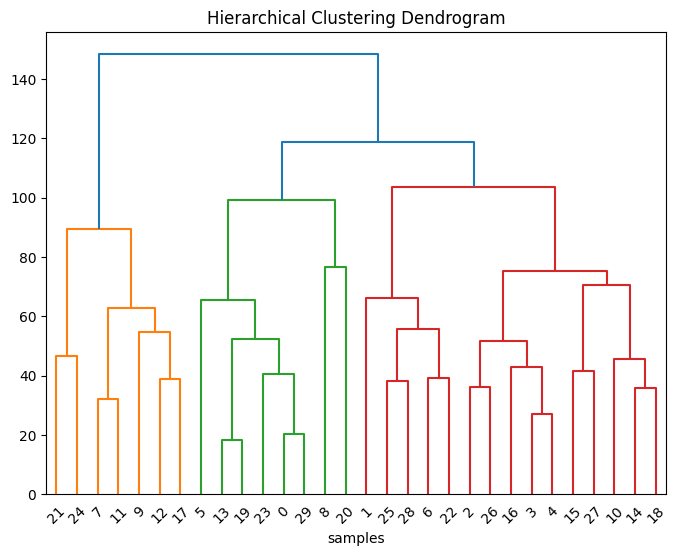

In [12]:
plt.figure(figsize=(8, 6))
Dendrogram.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

In [13]:
model = IntervalFuzzyCMeans(n_clusters=4, max_iter=200,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

array([[0.83945621, 0.04836984, 0.04661473, 0.06555923],
       [0.27932087, 0.19074804, 0.15563498, 0.37429611],
       [0.07189584, 0.2607644 , 0.14517532, 0.52216443],
       [0.067069  , 0.53658348, 0.24097131, 0.15537622],
       [0.08691423, 0.24647931, 0.47319921, 0.19340725],
       [0.6232415 , 0.12484387, 0.12063585, 0.13127879],
       [0.38608652, 0.14731758, 0.10728421, 0.3593117 ],
       [0.08081546, 0.28760661, 0.49811582, 0.13346211],
       [0.41303997, 0.23595196, 0.18167481, 0.16933326],
       [0.08951872, 0.25632402, 0.48653891, 0.16761836],
       [0.10184737, 0.19741826, 0.27534605, 0.42538832],
       [0.07092694, 0.51439001, 0.26769626, 0.1469868 ],
       [0.24904344, 0.26289849, 0.33018683, 0.15787123],
       [0.34947083, 0.2531737 , 0.15074271, 0.24661276],
       [0.1016932 , 0.16396005, 0.39401742, 0.34032933],
       [0.09049514, 0.14482361, 0.52153048, 0.24315076],
       [0.02284688, 0.77317532, 0.10594754, 0.09803026],
       [0.14615877, 0.3785399 ,

In [14]:
model.get_crisp_assignments()

print(SilhouetteScore.silhouette_score(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))

0.08554820705242709


In [15]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som.pca_weights_init(random_data.get_intervals())

In [16]:
som.train_incremental(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)


Neuron (0, 0) has these sample indices => [0, 5, 6, 13, 19, 22, 23, 25, 27, 28, 29]
Neuron (0, 1) has these sample indices => [1, 2, 10, 14, 15, 18, 26]
Neuron (1, 0) has these sample indices => [3, 4, 8, 20]
Neuron (1, 1) has these sample indices => [7, 9, 11, 12, 16, 17, 21, 24]


In [17]:
som_2 = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som_2.pca_weights_init(random_data.get_intervals())

In [18]:
som_2.train_batch(random_data.get_intervals(), verbose= False)

assignments = som_2.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

Neuron (1, 1) has these sample indices => [0, 5, 6, 13, 19, 22, 25, 27, 28, 29]
Neuron (0, 1) has these sample indices => [1, 14, 15, 26]
Neuron (0, 0) has these sample indices => [2, 3, 4, 7, 8, 9, 10, 11, 12, 16, 18, 21, 23, 24]
Neuron (1, 0) has these sample indices => [17, 20]
